***SOLUCIÓN EVALUACIÓN PARTE 2*** 😸\
**Nombres:** María Fernanda Estupiñan Aguilar [2210727] Y Jefferson Meza [2231482]

*Ecuaciones de Lorenz*\
$\frac{dx}{dt}=σ(y-x)$\
$\frac{dy}{dt}=x(\rho-z)-y$\
$\frac{dz}{dt}=xy-βz$

Describen el comportamiento de un sistema caótico, es decir, un sistema
que a pesar de ser determinístico puede tener comportamientos
drásticamente diferentes dependiendo de la selección de parámetros($σ,ρ,β$).

Se utilizará el Método de Runge-Kutta de 4to orden que es un método númerico iterativo para aproximar soluciones de EDO de 1er orden

$y_{i+1}=y_{i}+\frac{1}{6}(k_{1}+2k_{2}+2k_{3}+k-{4})h$

En donde

$k_{1}=f(x_{i},y_{i})$

$k_{2}=f(x_{i}+\frac{h}{2}, y_{i}+\frac{h}{2}⋅ k_{1})$

$k_{3}=f(x_{i}+\frac{h}{2}, y_{i}+\frac{h}{2}⋅ k_{2})$

$k_{4}=f(x_{i}+h, y_{i}+h⋅ k_{3})$



***Programas a Utilizar***

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

***Constantes y Parámetros***

In [ ]:
#Definimos los parámetros propios del sistema
#σ is Prandtl number
sigma = 10
#ρ is the Rayleigh number
rho = 28
#β relates to the physical dimensions of the fluid layer
beta = 8/3

#Parámetros de la Simulación con MRK4
#Tiempo final y variación del tiempo = h
t_final = 100
h = 0.01
numero_pasos = (int)(t_final/h)
t = np.linspace(0, t_final, numero_pasos)


***Selección de los 10 puntos***

In [ ]:
#Trayectorías de la forma (x_0, y_0, z_0)
puntos_iniciales = np.array ([
    [0,0,0],
    [1,1,1],
    [1,1,1.05],
    [1,0,1],
    [2,1,2],
    [2,1,2.05],
    [2,0,2],
    [3,1,3],
    [3,1,3.05],
    [3,0,3]
])

numero_trayectorias = puntos_iniciales.shape[0]

***Definición MKR4***

In [ ]:
def dXdt(x,y,sig=sigma):
    return sig*(y-x)

def dYdt(x,y,z,rho=rho):
    return x*(rho-z)-y

def dZdt(x,y,z,b=beta):
    return x*y-b*z

def MRK4_Lorenz(x0, y0, z0, t, dt):
    n = t.size
    x = np.empty(n)
    y = np.empty(n)
    z = np.empty(n)

    #Iniciar con el punto de partida
    x[0], y[0], z[0] = x0, y0, z0

    for i in range(1, n):
        #Coeficientes K, M, L para cada componente (x, y, z)
        #K1 (x), M1 (y), L1 (z)
        k1 = dt * dXdt(x[i-1], y[i-1])
        m1 = dt * dYdt(x[i-1], y[i-1], z[i-1])
        l1 = dt * dZdt(x[i-1], y[i-1], z[i-1])

        #K2, M2, L2
        k2 = dt * dXdt(x[i-1] + k1/2.0, y[i-1] + m1/2.0)
        m2 = dt * dYdt(x[i-1] + k1/2.0, y[i-1] + m1/2.0, z[i-1] + l1/2.0)
        l2 = dt * dZdt(x[i-1] + k1/2.0, y[i-1] + m1/2.0, z[i-1] + l1/2.0)

        #K3, M3, L3
        k3 = dt * dXdt(x[i-1] + k2/2.0, y[i-1] + m2/2.0)
        m3 = dt * dYdt(x[i-1] + k2/2.0, y[i-1] + m2/2.0, z[i-1] + l2/2.0)
        l3 = dt * dZdt(x[i-1] + k2/2.0, y[i-1] + m2/2.0, z[i-1] + l2/2.0)

        #K4, M4, L4
        k4 = dt * dXdt(x[i-1] + k3, y[i-1] + m3)
        m4 = dt * dYdt(x[i-1] + k3, y[i-1] + m3, z[i-1] + l3)
        l4 = dt * dZdt(x[i-1] + k3, y[i-1] + m3, z[i-1] + l3)

        #Promedio ponderado
        x[i] = x[i-1] + (k1 + 2*k2 + 2*k3 + k4) / 6.0
        y[i] = y[i-1] + (m1 + 2*m2 + 2*m3 + m4) / 6.0
        z[i] = z[i-1] + (l1 + 2*l2 + 2*l3 + l4) / 6.0

    return x, y, z

***Primera Simulación (Parámetros fijos $\sigma =10, \rho =28, \beta =8/3$)***

Iniciando simulación de las 10 trayectorias...
Simulación completa. 10 trayectorias calculadas.


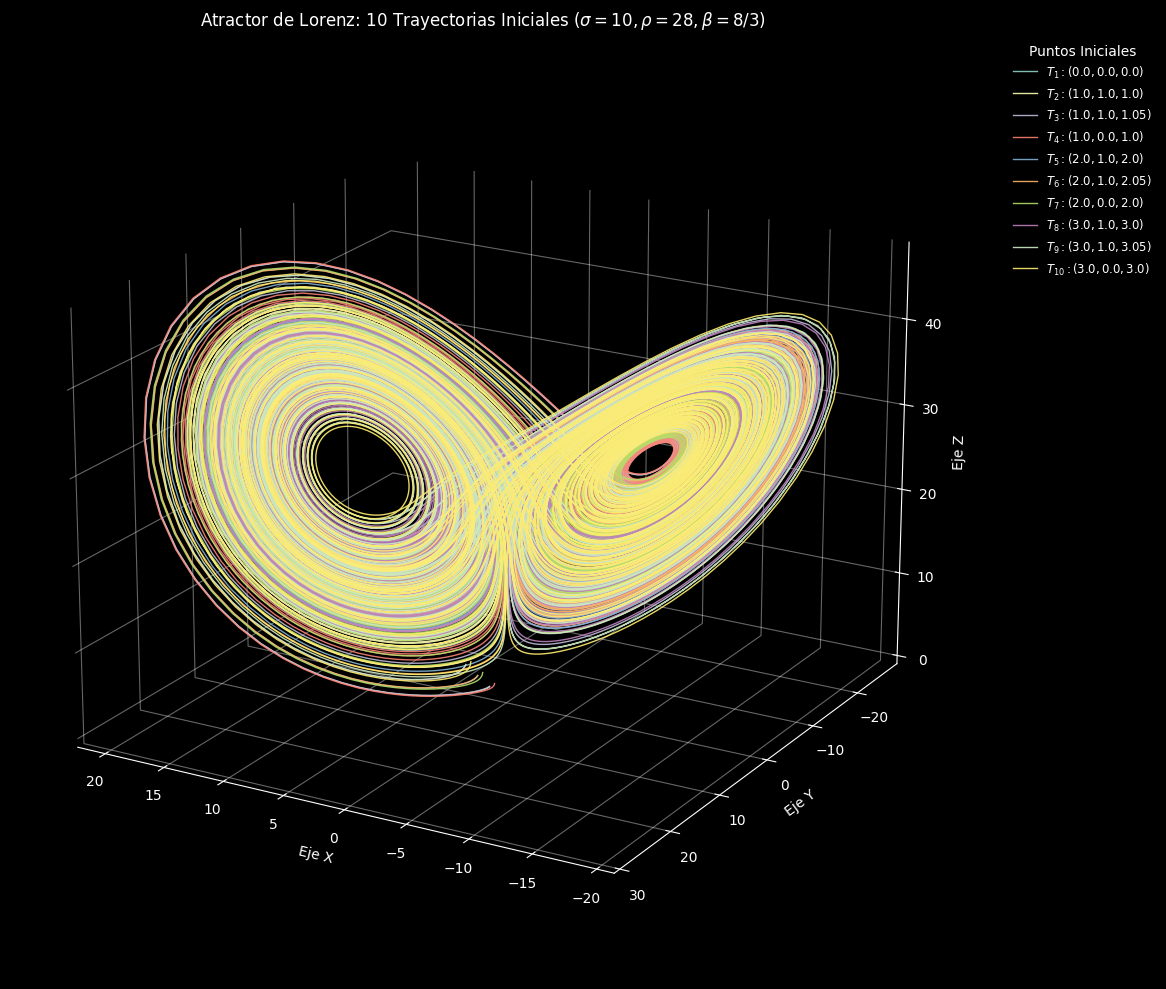

In [ ]:
#Lista para almacenar todas las trayectorias
todas_las_trayectorias = []

print("Iniciando simulación de las 10 trayectorias...")
for i in range(numero_trayectorias):
    x0, y0, z0 = puntos_iniciales[i]

    #Llamar al integrador RK4 para calcular la trayectoria
    x_i, y_i, z_i = MRK4_Lorenz(x0, y0, z0, t, h)

    #Almacenar la trayectoria como un arreglo de 3D
    trayectoria_i = np.stack([x_i, y_i, z_i], axis=1)
    todas_las_trayectorias.append(trayectoria_i)

print(f"Simulación completa. {numero_trayectorias} trayectorias calculadas.")

##GENERACIÓN DE LA GRÁFICA 3D
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

for i, trayectoria in enumerate(todas_las_trayectorias):

    x0, y0, z0 = puntos_iniciales[i]
    etiqueta = f'$T_{{{i+1}}}: ({x0}, {y0}, {z0})$'

    ax.plot(trayectoria[:, 0], trayectoria[:, 1], trayectoria[:, 2],
            lw=1.0, alpha=0.9,
            label=etiqueta)
ax.grid(True)
ax.xaxis._axinfo["grid"]['color'] = (1, 1, 1, 0.4)
ax.yaxis._axinfo["grid"]['color'] = (1, 1, 1, 0.4)
ax.zaxis._axinfo["grid"]['color'] = (1, 1, 1, 0.4)


ax.xaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))
ax.yaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))
ax.zaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))


ax.set_xlabel("Eje X", color='w')
ax.set_ylabel("Eje Y", color='w')
ax.set_zlabel("Eje Z", color='w')
ax.set_title(r"Atractor de Lorenz: 10 Trayectorias Iniciales ($\sigma=10, \rho=28, \beta=8/3$)", color='w')


ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1.0),
          title="Puntos Iniciales", fontsize='small', frameon=False)


ax.view_init(elev=20, azim=120)

plt.tight_layout()
plt.show()


***Segunda Simulación (Parámetros Variables)***

<>:83: SyntaxWarning: invalid escape sequence '\s'
<>:83: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-1312325582.py:83: SyntaxWarning: invalid escape sequence '\s'
  ax.set_title(rf"{params['titulo']}" + f"\n($\sigma={sig}, \\rho={rho}, \\beta={beta:.3f}$)", color='w', fontsize=12)


Generando 3 gráficas separadas con variación de parámetros... 📊


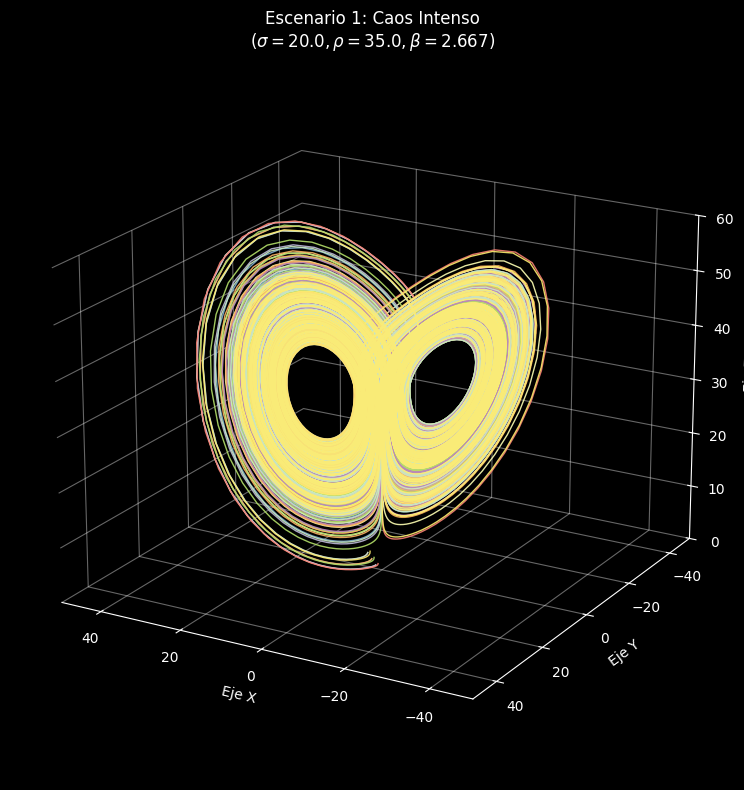

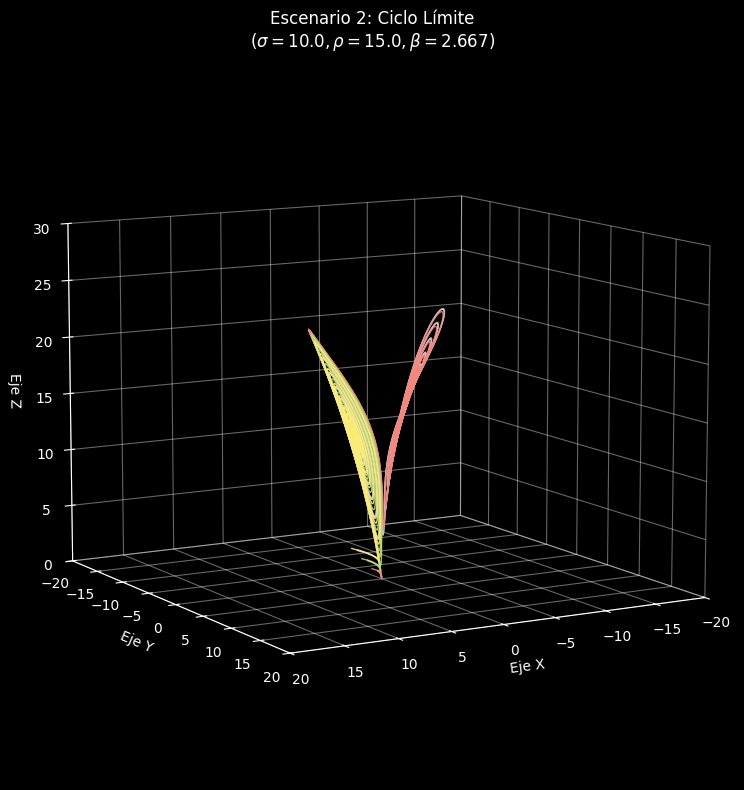

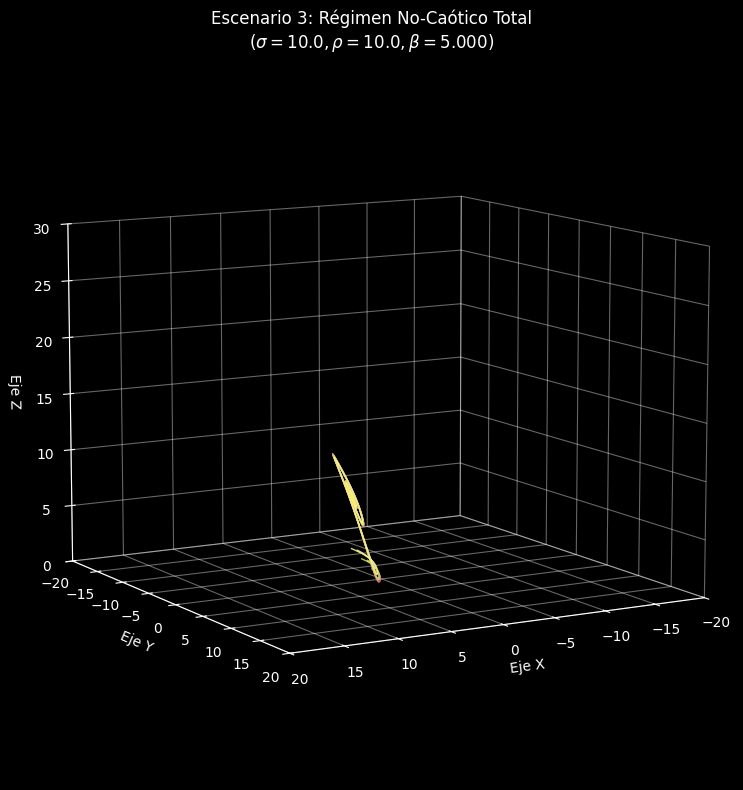

Las 3 gráficas separadas con variación de parámetros están listas. ✅


In [ ]:
#Redefinición de Ecuaciones
def dXdt(x, y, sig):
    return sig * (y - x)

def dYdt(x, y, z, rho):
    return x * (rho - z) - y

def dZdt(x, y, z, beta):
    return x * y - beta * z

#Ahora acepta 8 argumentos
def MRK4_Lorenz(x0, y0, z0, t, h, sig, rho, beta):
    n = t.size
    x = np.empty(n)
    y = np.empty(n)
    z = np.empty(n)

    x[0], y[0], z[0] = x0, y0, z0

    for i in range(1, n):
        # Coeficientes K, M, L para cada componente (x, y, z)
        # Usamos los parámetros de Lorenz pasados como argumentos
        k1 = h * dXdt(x[i-1], y[i-1], sig)
        m1 = h * dYdt(x[i-1], y[i-1], z[i-1], rho)
        l1 = h * dZdt(x[i-1], y[i-1], z[i-1], beta)

        k2 = h * dXdt(x[i-1] + k1/2.0, y[i-1] + m1/2.0, sig)
        m2 = h * dYdt(x[i-1] + k1/2.0, y[i-1] + m1/2.0, z[i-1] + l1/2.0, rho)
        l2 = h * dZdt(x[i-1] + k1/2.0, y[i-1] + m1/2.0, z[i-1] + l1/2.0, beta)

        k3 = h * dXdt(x[i-1] + k2/2.0, y[i-1] + m2/2.0, sig)
        m3 = h * dYdt(x[i-1] + k2/2.0, y[i-1] + m2/2.0, z[i-1] + l2/2.0, rho)
        l3 = h * dZdt(x[i-1] + k2/2.0, y[i-1] + m2/2.0, z[i-1] + l2/2.0, beta)

        k4 = h * dXdt(x[i-1] + k3, y[i-1] + m3, sig)
        m4 = h * dYdt(x[i-1] + k3, y[i-1] + m3, z[i-1] + l3, rho)
        l4 = h * dZdt(x[i-1] + k3, y[i-1] + m3, z[i-1] + l3, beta)

        x[i] = x[i-1] + (k1 + 2*k2 + 2*k3 + k4) / 6.0
        y[i] = y[i-1] + (m1 + 2*m2 + 2*m3 + m4) / 6.0
        z[i] = z[i-1] + (l1 + 2*l2 + 2*l3 + l4) / 6.0

    return x, y, z

#Gráficas
escenarios = [
    {"sigma": 20.0, "rho": 35.0, "beta": 8/3, "titulo": "Escenario 1: Caos Intenso"},
    {"sigma": 10.0, "rho": 15.0, "beta": 8/3, "titulo": "Escenario 2: Ciclo Límite"},
    {"sigma": 10.0, "rho": 10.0, "beta": 5.0, "titulo": "Escenario 3: Régimen No-Caótico Total"},
]

plt.style.use('dark_background')

print("Generando 3 gráficas separadas con variación de parámetros... 📊")

for idx, params in enumerate(escenarios):
    sig, rho, beta = params["sigma"], params["rho"], params["beta"]

    trayectorias_escenario = []
    for i in range(numero_trayectorias):
        x0, y0, z0 = puntos_iniciales[i]
        x_i, y_i, z_i = MRK4_Lorenz(x0, y0, z0, t, h, sig, rho, beta)
        trayectorias_escenario.append(np.stack([x_i, y_i, z_i], axis=1))

    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    for i, trayectoria in enumerate(trayectorias_escenario):
        ax.plot(trayectoria[:, 0], trayectoria[:, 1], trayectoria[:, 2],
                lw=1.0, alpha=0.9)

    ax.grid(True)
    ax.xaxis._axinfo["grid"]['color'] = (1, 1, 1, 0.4)
    ax.yaxis._axinfo["grid"]['color'] = (1, 1, 1, 0.4)
    ax.zaxis._axinfo["grid"]['color'] = (1, 1, 1, 0.4)

    ax.xaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))
    ax.yaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))
    ax.zaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))

    ax.set_xlabel("Eje X", color='w'); ax.set_ylabel("Eje Y", color='w'); ax.set_zlabel("Eje Z", color='w')

    ax.set_title(rf"{params['titulo']}" + f"\n($\sigma={sig}, \\rho={rho}, \\beta={beta:.3f}$)", color='w', fontsize=12)

    if rho > 24:
        ax.set_xlim(-50, 50); ax.set_ylim(-50, 50); ax.set_zlim(0, 60)
        ax.view_init(elev=20, azim=120)
    else:
        ax.set_xlim(-20, 20); ax.set_ylim(-20, 20); ax.set_zlim(0, 30)
        ax.view_init(elev=10, azim=60)

    plt.tight_layout()
    plt.show()

print("Las 3 gráficas separadas con variación de parámetros están listas. ✅")

***Observaciones***


*   Primer escenario: El sistema permanece en el régimen caótico, pero la forma del atractor es más grande.
*   Segundo escenario: El sistema sale del régimen caótico, reduce su tamaño, parece coincidir (converger) en un lazo doble y las trayectorias no se ven tan dispersas.
*   Tercer escenario: la órbita es mucho más pequeña y se encunetra cerca del centro, limitando el movimiento y asegurando que un sistema más estable y predecible que los dos anteriores




